In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



In [3]:
ggl_trfc_df = pd.read_csv('/Users/jaya/Downloads/Git/Github/sustainable-future/Sustainable-Future-Phase 2/Data/Mill Road Traffic Data.csv')
ggl_trfc_df


,Junction Code,Day,Time of the Day,Traffic Lane 1,Traffic Lane 2,Traffic Lane 1 #,Traffic Lane 2 #,Sum
0,G,Monday,6:00,Green,Green,0,0,0
1,G,Monday,8:00,Green,Orange,0,3,3
2,G,Monday,10:00,Orange,Orange,3,3,6
3,G,Monday,12:00,Orange,Orange,3,3,6
4,G,Monday,14:00,Orange,Orange,3,3,6
...,...,...,...,...,...,...,...,...
247,J,Sunday,14:00,Green,Green,0,0,0
248,J,Sunday,16:00,Green,Green,0,0,0
249,J,Sunday,18:00,Green,Green,0,0,0
250,J,Sunday,20:00,Green,Green,0,0,0


In [4]:
ggl_trfc_df = ggl_trfc_df.drop(["Traffic Lane 1", "Traffic Lane 2", "Junction Code", "Sum"], axis=1)
time_df = pd.DataFrame(['6', '8', '10', '12', '14', '16', '18', '20', '22'], columns=['Time of the Day'])
ggl_trfc_df['Time of the Day'] = (ggl_trfc_df['Time of the Day'].str.split(':').str[0]).astype('Int64')
ggl_trfc_df


,Day,Time of the Day,Traffic Lane 1 #,Traffic Lane 2 #
0,Monday,6,0,0
1,Monday,8,0,3
2,Monday,10,3,3
3,Monday,12,3,3
4,Monday,14,3,3
...,...,...,...,...
247,Sunday,14,0,0
248,Sunday,16,0,0
249,Sunday,18,0,0
250,Sunday,20,0,0


In [5]:
df = pd.read_csv("/Users/jaya/Downloads/Git/Github/sustainable-future/Sustainable-Future-Phase 2/Data/Mill Road (East)_2 for ploting.csv")
df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])

# Drop the original 'Date' and 'Time' columns if no longer needed
df.drop(columns=['Date', 'Time'], inplace=True)
df['DayOfWeek'] = df['DateTime'].dt.day_name()
# Extract hour from the 'DateTime' column
df['Hour'] = df['DateTime'].dt.hour
df = df[(df['DateTime'] > '2022-05-01 00:00:00') & (df['DateTime'] < '2022-07-30 23:59:00')]

groupedData = pd.DataFrame(df.groupby(['DayOfWeek', 'Hour'])['Total'].median())
groupedData.reset_index(inplace=True)
groupedData


,DayOfWeek,Hour,Total
0,Friday,0,82.0
1,Friday,1,39.0
2,Friday,2,28.0
3,Friday,3,30.0
4,Friday,4,32.0
...,...,...,...
163,Wednesday,19,427.0
164,Wednesday,20,353.0
165,Wednesday,21,308.0
166,Wednesday,22,251.0


In [6]:
merged_df = pd.merge(ggl_trfc_df, groupedData, left_on=["Day", "Time of the Day"], right_on=["DayOfWeek", "Hour"])
merged_df = merged_df.drop(['Time of the Day', 'DayOfWeek'], axis=1)


In [7]:
weekday_map = {'Monday':1, 'Tuesday':2, 'Wednesday':3, 'Thursday':4, 'Friday':5, 'Saturday':6, 'Sunday':7}


In [8]:
merged_df["Day"] = merged_df["Day"].map(weekday_map)


In [9]:
merged_df


,Day,Traffic Lane 1 #,Traffic Lane 2 #,Hour,Total
0,1,0,0,6,130.0
1,1,0,0,6,130.0
2,1,0,0,6,130.0
3,1,0,0,6,130.0
4,1,0,3,8,437.0
...,...,...,...,...,...
247,7,0,0,20,339.0
248,7,0,0,22,206.0
249,7,0,0,22,206.0
250,7,0,0,22,206.0


In [14]:
merged_df.describe()


,Day,Traffic Lane 1 #,Traffic Lane 2 #,Hour,Total
count,252.00000,252.000000,252.000000,252.000000,252.000000
mean,4.00000,1.238095,1.583333,14.000000,374.507937
std,2.00398,1.479898,1.578302,5.174254,129.659668
min,1.00000,0.000000,0.000000,6.000000,46.000000
25%,2.00000,0.000000,0.000000,10.000000,272.000000
50%,4.00000,0.000000,3.000000,14.000000,419.000000
75%,6.00000,3.000000,3.000000,18.000000,480.000000
max,7.00000,3.000000,5.000000,22.000000,547.000000


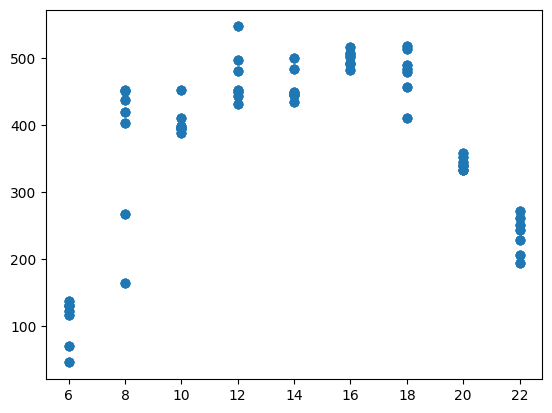

In [19]:
plt.scatter(merged_df["Hour"], merged_df["Total"])


{'whiskers': [<matplotlib.lines.Line2D at 0x14a6fd780>,
 'caps': [<matplotlib.lines.Line2D at 0x14a6fdcc0>,
 'boxes': [<matplotlib.lines.Line2D at 0x14a6fd4e0>],
 'medians': [<matplotlib.lines.Line2D at 0x14a6fe200>],
 'fliers': [<matplotlib.lines.Line2D at 0x14a6fe4a0>],
 'means': []}

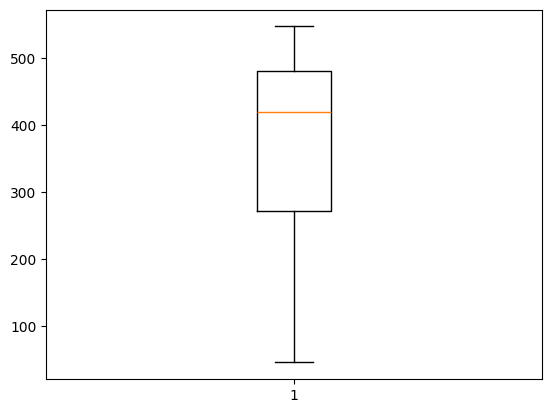

In [20]:
plt.boxplot(merged_df["Total"])


In [34]:
from sklearn.ensemble import IsolationForest

df = merged_df.copy(deep=True)
# Fit the model
clf = IsolationForest(contamination=0.05, random_state=42)
df['anomaly'] = clf.fit_predict(df[["Total"]])

# Identify outliers
outliers = df[df['anomaly'] == -1]
print(outliers)


     Day  Traffic Lane 1 #  Traffic Lane 2 #  Hour  Total  anomaly
156    5                 3                 3    12  547.0       -1
157    5                 3                 3    12  547.0       -1
158    5                 3                 3    12  547.0       -1
159    5                 0                 0    12  547.0       -1
180    6                 0                 0     6   70.0       -1
181    6                 0                 0     6   70.0       -1
182    6                 0                 0     6   70.0       -1
183    6                 0                 0     6   70.0       -1
216    7                 0                 0     6   46.0       -1
217    7                 0                 0     6   46.0       -1
218    7                 0                 0     6   46.0       -1
219    7                 0                 0     6   46.0       -1


In [35]:
df = df[df["anomaly"] != -1]


In [36]:
df.drop("anomaly", axis=1, inplace=True)


In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
#from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error

# Assuming you have your data loaded into a DataFrame df, where the last column is the target variable

# Splitting the data into features and target variable
X = df.drop("Total", axis=1)  
y = df["Total"]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "ElasticNet Regression": ElasticNet(),
    "SVR": SVR(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "AdaBoost": AdaBoostRegressor(),
    "XGBoost": XGBRegressor(),
    "CatBoost": CatBoostRegressor(verbose=False)
}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"{name}: Root Mean Squared Error: {rmse}")


Linear Regression: Root Mean Squared Error: 92.13490545715943
Ridge Regression: Root Mean Squared Error: 92.10532890041246
Lasso Regression: Root Mean Squared Error: 91.7565655196543
ElasticNet Regression: Root Mean Squared Error: 89.56177962055175
SVR: Root Mean Squared Error: 95.78225186486472
Random Forest: Root Mean Squared Error: 2.402041666305288
Gradient Boosting: Root Mean Squared Error: 16.851218972051054
AdaBoost: Root Mean Squared Error: 25.360816091623335
XGBoost: Root Mean Squared Error: 2.1912504680364457
CatBoost: Root Mean Squared Error: 4.2132237338202545


In [39]:
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# Assuming you have your data loaded into a DataFrame df, where the last column is the target variable

# Splitting the data into features and target variable
X = df.drop("Total", axis=1)  
y = df["Total"]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Define XGBoost regressor
xgb_reg = XGBRegressor(objective='reg:squarederror')

# Define parameter grid for grid search
param_grid = {
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.5, 0.7, 0.9],
    'colsample_bytree': [0.5, 0.7, 0.9],
    'n_estimators': [100, 200, 300]
}

# Perform grid search
grid_search = GridSearchCV(estimator=xgb_reg, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Initialize XGBoost regressor with the best parameters
best_xgb_reg = XGBRegressor(objective='reg:squarederror', **best_params)

# Train the model with the best parameters
best_xgb_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_xgb_reg.predict(X_test)

# Calculate MSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", rmse)


Best Parameters: {'colsample_bytree': 0.5, 'learning_rate': 0.3, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 300, 'subsample': 0.9}
Root Mean Squared Error: 1.6299934653152535


Root Mean Squared Error (RMSE): 1.6299934653152535
Mean Absolute Error (MAE): 1.2066125869750977
R-squared (R^2): 0.9996876428865142


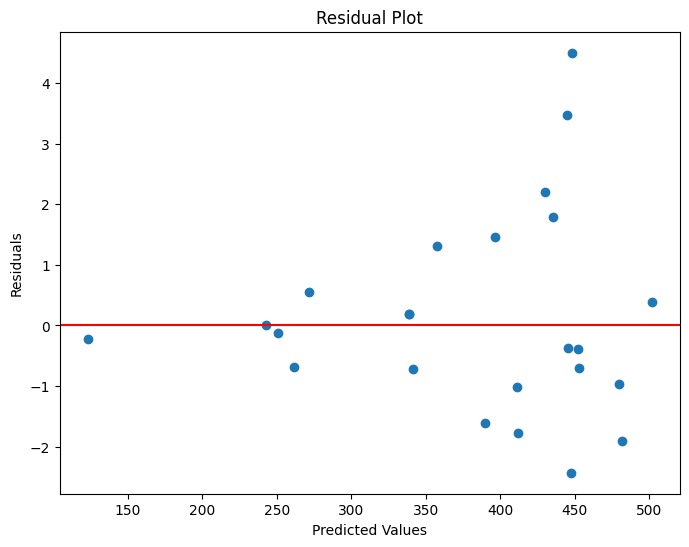

In [40]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R^2):", r2)

# Residual Analysis
residuals = y_test - y_pred

# Plotting Residuals
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals)
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='-')
plt.show()


In [41]:
from joblib import dump

# Save the trained model to a file
dump(best_xgb_reg, 'xgb_model.joblib')


['xgb_model.joblib']